# What Test to Use

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
df = pd.read_csv('ESSdata_Thinkful.csv')

In [7]:
df.cntry.value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [4]:
countries = df.cntry.unique().tolist()

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## 1.0 Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

A: A/B test because it can be a before and after (2012 to 2014)

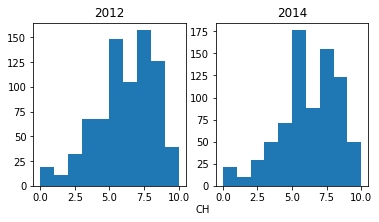

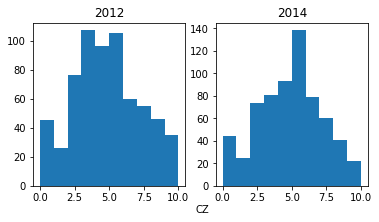

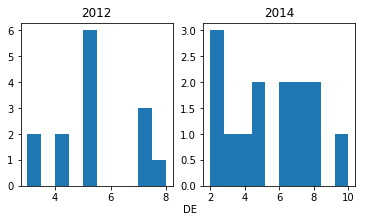

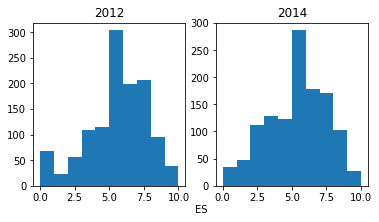

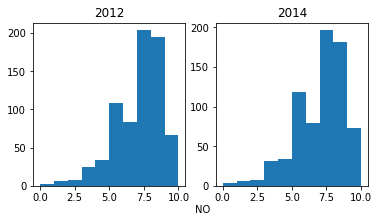

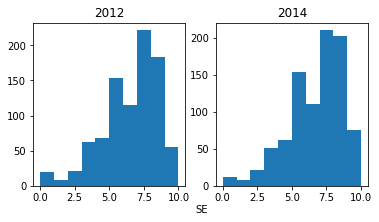

In [14]:
for country in countries:
    fig, ax = plt.subplots(1,2,figsize = (6,3))
    ax[0].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].dropna())
    ax[1].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].dropna())
    ax[0].set_title('2012')
    ax[1].set_title('2014')
    fig.text(0.5, 0, country)
    plt.show()

In [21]:
for country in countries:
    print("\n" + country)
    print('2012 mean: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].mean()))
    print(stats.ttest_rel(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],
                          nan_policy='omit'
                         ))


CH
2012 mean: 5.68
2014 mean: 5.75
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

CZ
2012 mean: 4.36
2014 mean: 4.42
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)

DE
2012 mean: 5.21
2014 mean: 5.36
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

ES
2012 mean: 5.11
2014 mean: 4.90
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320284)

NO
2012 mean: 6.65
2014 mean: 6.60
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)

SE
2012 mean: 6.06
2014 mean: 6.26
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


A significant p-value is < 0.05. With the parametric t-test only Spain (ES) and Sweden (SE) showed significant differences in trust data from 2012 to 2014. Spain showed a decreased in trust and Sweden showed an increase in trust

In [23]:
#non-parametric
for country in countries:
    print("\n" + country)
    print('2012 mean: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].mean()))
    print(stats.wilcoxon(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],
                         zero_method = 'wilcox'
                         ))


CH
2012 mean: 5.68
2014 mean: 5.75
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

CZ
2012 mean: 4.36
2014 mean: 4.42
WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

DE
2012 mean: 5.21
2014 mean: 5.36
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

ES
2012 mean: 5.11
2014 mean: 4.90
WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

NO
2012 mean: 6.65
2014 mean: 6.60
WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

SE
2012 mean: 6.06
2014 mean: 6.26
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:2781: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:2782: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


While p-values changes with the parametric text, still only Spain and Sweden had significant results

## 2.0 Did people become happier from 2012 to 2014? Compute results for each country in the sample.

This is another before/after mean comparison A/B test

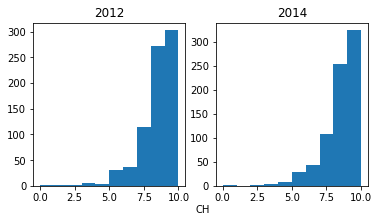

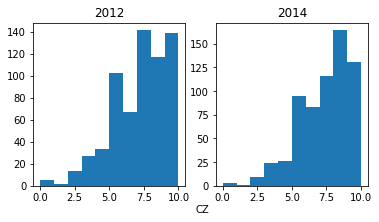

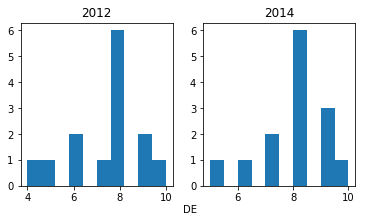

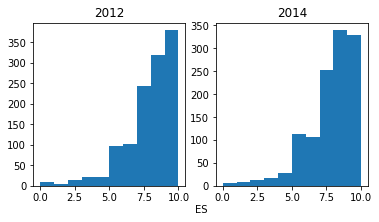

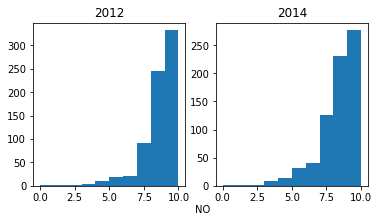

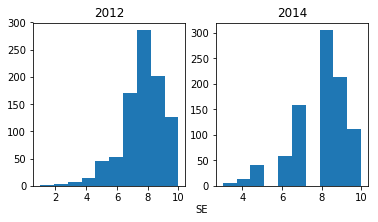

In [25]:
for country in countries:
    fig, ax = plt.subplots(1,2,figsize = (6,3))
    ax[0].hist(df['happy'][(df['cntry'] == country) & (df['year']==6)].dropna())
    ax[1].hist(df['happy'][(df['cntry'] == country) & (df['year']==7)].dropna())
    ax[0].set_title('2012')
    ax[1].set_title('2014')
    fig.text(0.5, 0, country)
    plt.show()

Values are all skewed to the right, so we should use a non-parametric method

In [26]:
for country in countries:
    print("\n" + country)
    print('2012 mean: {0:.2f}'.format(df['happy'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}'.format(df['happy'][(df['cntry'] == country) & (df['year']==7)].mean()))
    print(stats.wilcoxon(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],
                         zero_method = 'wilcox'
                         ))


CH
2012 mean: 8.09
2014 mean: 8.12
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

CZ
2012 mean: 6.77
2014 mean: 6.91
WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

DE
2012 mean: 7.43
2014 mean: 7.86
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

ES
2012 mean: 7.55
2014 mean: 7.42
WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

NO
2012 mean: 8.25
2014 mean: 7.92
WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

SE
2012 mean: 7.91
2014 mean: 7.95
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


Once again, Sweden and Spain are the only ones with significant results. In Sweden, happiness increased and in Spain happiness decreased

## 3.0 Who reported watching more TV in 2012, men or women?

Unpaired t-test since it is not a before/after

In [30]:
male = df['tvtot'][(df['gndr']==1.0) & (df['year']==6)]
female = df['tvtot'][(df['gndr']==2.0) & (df['year']==6)]

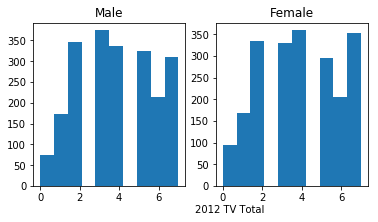

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].hist(male.dropna())
ax[1].hist(female.dropna())
fig.text(0.5, 0, '2012 TV Total')
ax[0].set_title('Male')
ax[1].set_title('Female')  
plt.show()

In [32]:
print('Male mean: {0:.2f}'.format(male.mean()))
print('Female mean: {0:.2f}'.format(female.mean()))  
print(stats.ttest_ind(male, 
                    female,
                    nan_policy='omit'
                    ))

Male mean: 3.90
Female mean: 3.94
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)


The means are very similar for tv time and there is no significant different between the values

## 4.0 Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Unpaired t-test since it is not a before/after

In [42]:
single = df['pplfair'][(df['partner']==2.0) & (df['year']==6)]
partner = df['pplfair'][(df['partner']==1.0) & (df['year']==6)]

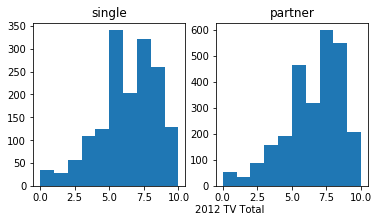

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].hist(single.dropna())
ax[1].hist(partner.dropna())
fig.text(0.5, 0, '2012 TV Total')
ax[0].set_title('single')
ax[1].set_title('partner')  
plt.show()

In [44]:
print('Lives alone mean: {0:.2f}'.format(single.mean()))
print('Lives with partner mean: {0:.2f}'.format(partner.mean()))  
print(stats.ttest_ind(male, 
                    female,
                    nan_policy='omit'
                    ))

Lives alone mean: 5.86
Lives with partner mean: 6.08
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)


Not much of a differnce here, and the p-value is not significant

## 5.0 Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

One-way ANOVA because we need to determine if there are any statistically significant differences between the means of two or more independent (unrelated) groups

In [41]:
three_countries = countries[3:]
print(three_countries)

['ES', 'NO', 'SE']


In [54]:
spain_soc = df['sclmeet'][(df['cntry']=='ES') & (df['year']==7)].dropna()
sweden_soc = df['sclmeet'][(df['cntry']=='SE') & (df['year']==7)].dropna()
norway_soc = df['sclmeet'][(df['cntry']=='NO') & (df['year']==7)].dropna()

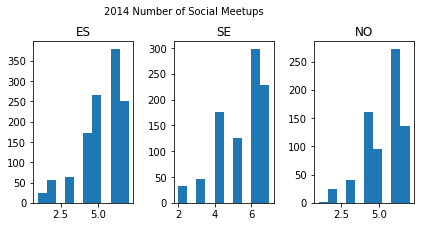

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))
axs[0].hist(spain_soc)
axs[1].hist(sweden_soc)
axs[2].hist(norway_soc)

fig.text(0.25, 1, '2014 Number of Social Meetups')
axs[0].set_title('ES')
axs[1].set_title('SE')
axs[2].set_title('NO')
fig.tight_layout()
plt.show()

In [52]:
print(spain_soc)

4103    7.0
4104    2.0
4105    7.0
4106    7.0
4107    7.0
4108    3.0
4109    6.0
4110    6.0
4111    7.0
4112    6.0
4113    6.0
4114    6.0
4115    4.0
4116    5.0
4117    6.0
4118    6.0
4119    5.0
4120    6.0
4121    7.0
4122    5.0
4123    5.0
4124    6.0
4125    7.0
4126    5.0
4127    7.0
4128    4.0
4129    5.0
4130    6.0
4131    4.0
4132    4.0
       ... 
5286    5.0
5287    6.0
5288    5.0
5289    5.0
5290    5.0
5291    6.0
5292    4.0
5293    5.0
5294    4.0
5295    5.0
5296    6.0
5297    5.0
5298    4.0
5299    4.0
5300    4.0
5301    4.0
5302    6.0
5303    5.0
5304    4.0
5305    2.0
5306    6.0
5307    6.0
5308    6.0
5309    7.0
5310    4.0
5311    5.0
5312    6.0
5313    7.0
5314    6.0
5315    5.0
Name: sclmeet, Length: 1213, dtype: float64


In [58]:
F, p = stats.f_oneway(
    spain_soc,
    sweden_soc,
    norway_soc)

print("F-stat: ",F,'\np-value:', p)

F-stat:  3.726110434690217 
p-value: 0.02420388186106648


There is a significant difference in social interactions between the countries

## 6.0 Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Two-way ANOVA to compare means between two independent variables (age and social interactions)

In [59]:
spain_soc_age = df['sclact'][(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()
norway_soc_age = df['sclact'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()
sweden_soc_age = df['sclact'][(df['cntry'] == 'SE') & (df['year'] == 7)].dropna()

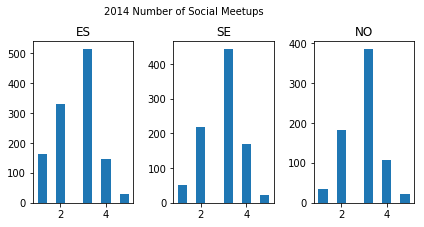

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))
axs[0].hist(spain_soc_age)
axs[1].hist(sweden_soc_age)
axs[2].hist(norway_soc_age)

fig.text(0.25, 1, '2014 Number of Social Meetups')
axs[0].set_title('ES')
axs[1].set_title('SE')
axs[2].set_title('NO')
fig.tight_layout()
plt.show()

In [62]:
F, p = stats.f_twoway(
    spain_soc_age,
    sweden_soc_age,
    norway_soc_age)

print("F-stat: ",F,'\np-value:', p)

AttributeError: module 'scipy.stats' has no attribute 'f_twoway'